In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('clmentbisaillon/fake-and-real-news-dataset', path='.', unzip=True)

In [4]:
# Load dataset
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Tambahkan label pada masing-masing dataset
df_fake['label'] = 0  # 0 untuk berita palsu
df_true['label'] = 1  # 1 untuk berita asli

# Gabungkan kedua dataset
df = pd.concat([df_fake, df_true], ignore_index=True)

# Tampilkan beberapa baris pertama
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download stopwords jika belum
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Tokenize dan hapus stopwords + stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    # Gabungkan kembali menjadi string
    return ' '.join(words)

# Terapkan preprocessing ke kolom teks
df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Athaya
[nltk_data]     Rohadatul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)


In [7]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit dan transform data training dan testing
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)


In [8]:
# Inisialisasi model
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Prediksi
y_pred = pac.predict(tfidf_test)

# Evaluasi
score = accuracy_score(y_test, y_pred)
print(f'Akurasi: {round(score*100,2)}%')

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels=[0,1])
print(confusion)


Akurasi: 99.37%
[[4693   34]
 [  23 4230]]


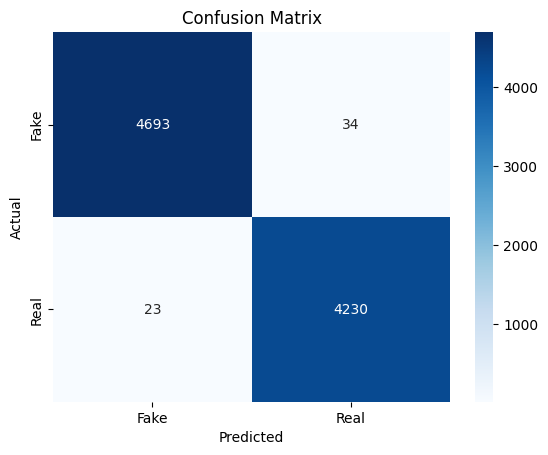

In [10]:
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4727
        Real       0.99      0.99      0.99      4253

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

